$X_1\sim\text{Uniform(0, 1)}$

$X_2\sim\text{Uniform(0, 1)}$

$X_3\sim\text{Uniform(0, 1)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd

In [2]:
# number of samples
n = 10000

# Random variables X_i
X_1 = np.random.uniform(0, 1, size=n)
X_2 = np.random.uniform(0, 1, size=n)
X_3 = np.random.uniform(0, 1, size=n)

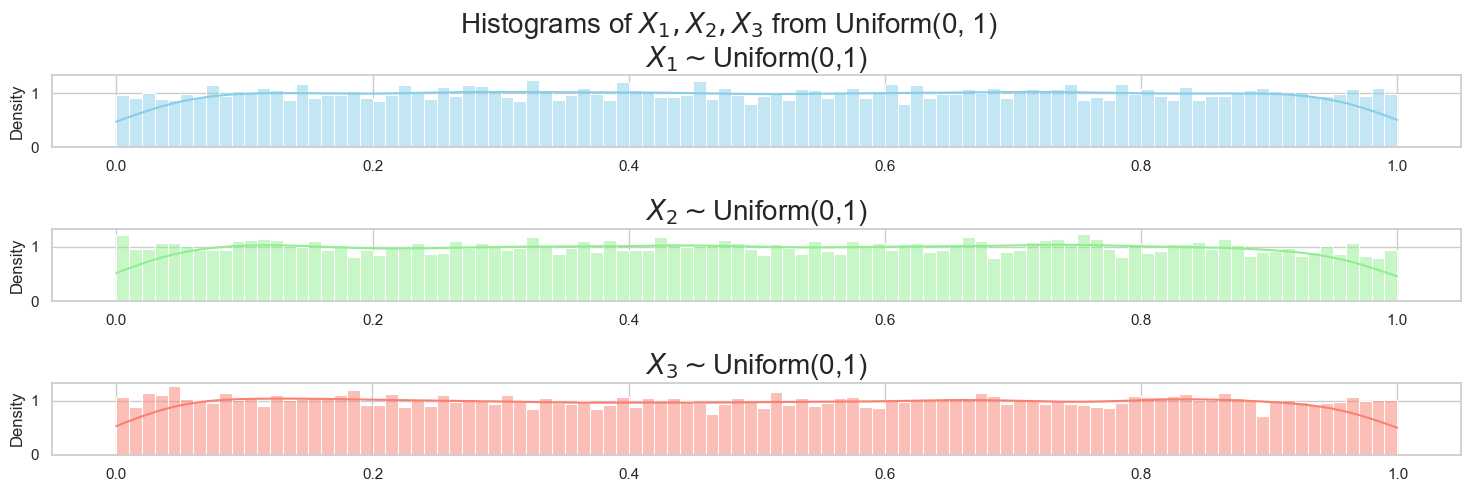

In [3]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 5), sharey=True)

# Plot histograms using Seaborn
sns.histplot(X_1, bins=100, kde=True, stat='density', ax=axes[0], color='skyblue')
axes[0].set_title(r'$X_1 \sim $Uniform(0,1)', fontsize=20)

sns.histplot(X_2, bins=100, kde=True, stat='density', ax=axes[1], color='lightgreen')
axes[1].set_title(r'$X_2 \sim $Uniform(0,1)', fontsize=20)

sns.histplot(X_3, bins=100, kde=True, stat='density', ax=axes[2], color='salmon')
axes[2].set_title(r'$X_3 \sim $Uniform(0,1)', fontsize=20)

# Overall layout
fig.suptitle(r'Histograms of $X_1, X_2, X_3$ from Uniform(0, 1)', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

# Sumations of I.I.D random variables

I.I.D. = Independent and Identically Distributed

In [4]:
# Sum of the three variables
summations = X_1 + X_2 + X_3

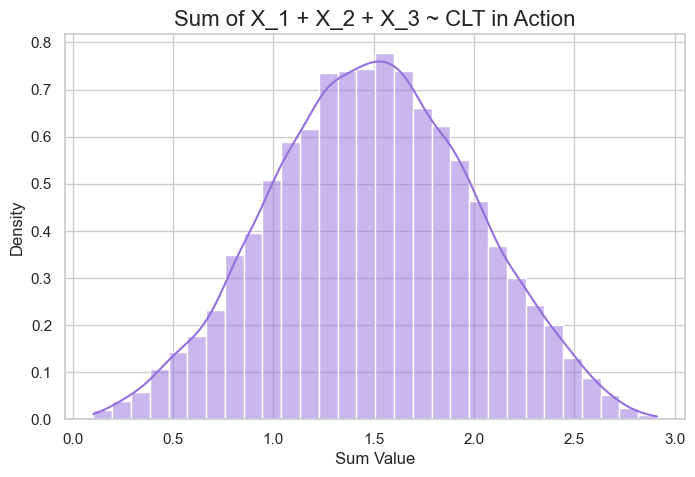

In [5]:
# Plot
plt.figure(figsize=(8, 5))
sns.histplot(summations, bins=30, kde=True, stat='density', color='mediumpurple')
plt.title(r'Sum of X_1 + X_2 + X_3 ~ CLT in Action', fontsize=16)
plt.xlabel('Sum Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()

# Central Limit Theorem (CLT) — Statement

Let $X_1, X_2, \ldots, X_n$ be **independent and identically distributed (i.i.d.)** random variables with finite mean $\mu$ and finite variance $\sigma^2 > 0$. Then the standardized sum:

$$
Z_n = \frac{\sum_{i=1}^n X_i - n\mu}{\sigma \sqrt{n}}
$$

**converges in distribution** to a standard normal distribution $\mathcal{N}(0,1)$ as $n \to \infty$:

$$
Z_n \xrightarrow{d} \mathcal{N}(0,1)
$$


In [6]:
mu = 0.5
sigma = 0.2887

Z = (summations - n * mu) / (sigma * np.sqrt(n))

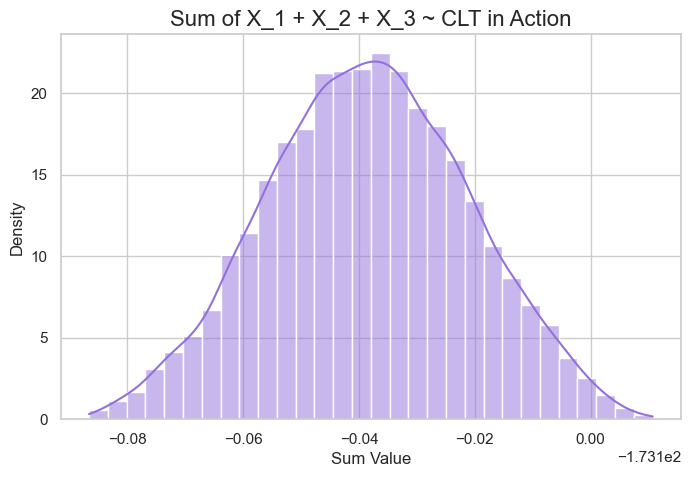

In [7]:
# Plot
plt.figure(figsize=(8, 5))
sns.histplot(Z, bins=30, kde=True, stat='density', color='mediumpurple')
plt.title(r'Sum of X_1 + X_2 + X_3 ~ CLT in Action', fontsize=16)
plt.xlabel('Sum Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()

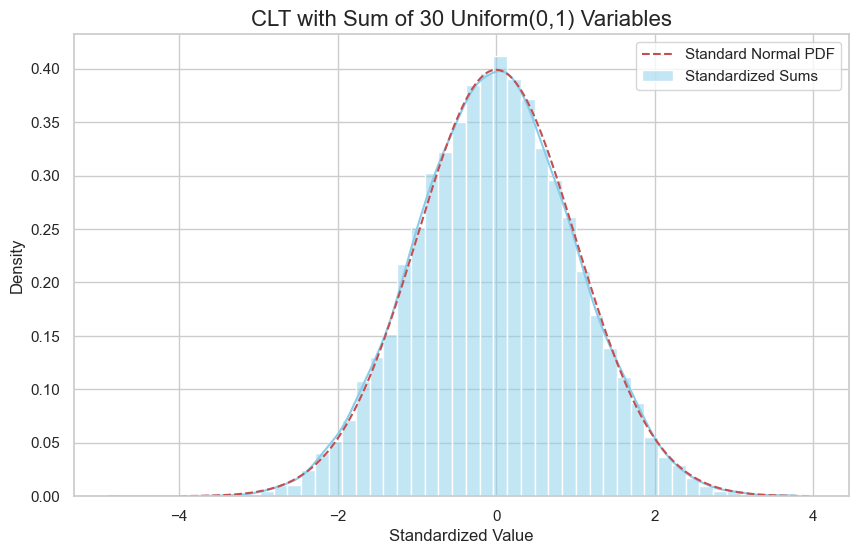

In [8]:
# Parameters
n = 30               # number of i.i.d. variables per sample
num_samples = 10000  # how many times we repeat the sum

# True mean and std of Uniform(0,1)
mu = 0.5
sigma = 1 / np.sqrt(12)  # std dev = (b - a)/sqrt(12)

# Step 1: Generate Uniform(0,1) data
data = np.random.uniform(0, 1, size=(num_samples, n))

# Step 2: Sum across axis=1 (rows)
sums = np.sum(data, axis=1)

# Step 3: Standardize using CLT formula
standardized = (sums - n * mu) / (sigma * np.sqrt(n))

# Step 4: Plot histogram and normal PDF
plt.figure(figsize=(10, 6))
sns.histplot(standardized, bins=50, kde=True, stat='density', color='skyblue', label='Standardized Sums')
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x), 'r--', label='Standard Normal PDF')
plt.title(f'CLT with Sum of {n} Uniform(0,1) Variables', fontsize=16)
plt.xlabel('Standardized Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
